In [20]:
import tensorflow as tf

In [21]:
import keras
from keras.models import Sequential

In [22]:
from keras.layers import Flatten,Dense

In [23]:
#only model building part
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=10,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

In [24]:
model.add(model_part1)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

In [11]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist

In [13]:
fashion_mnist=keras.datasets.fashion_mnist

In [14]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train[0].shape

(28, 28)

In [30]:
#it is grey scale
#it has fix size of 28,28

In [31]:
import cv2
import numpy as np

In [34]:
def res_imgarr(img, dims):
    img=cv2.resize(img,dsize=dims,interpolation=cv2.INTER_CUBIC)
    img=np.array(img,dtype=np.float32)
    return img

In [38]:
img.shape

(28, 28, 3)

In [44]:
imgdim = (32, 32)
X_train = np.array([res_imgarr(img, dims=imgdim) for img in X_train])

In [46]:
img1 = np.zeros((len(X_train),32,32,3))
for i in range(X_train.shape[0]):
    img1[i]=cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2RGB)

In [51]:
import matplotlib.pyplot as plt

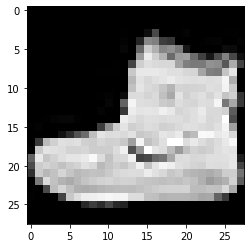

In [53]:
plt.imshow(img)

In [55]:


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])



In [56]:
model.fit(img1,Y_train,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 179s 106ms/step - loss: 0.5536 - accuracy: 0.8126 - val_loss: 0.4380 - val_accuracy: 0.8375
Epoch 2/3
1688/1688 [==============================] - 189s 112ms/step - loss: 0.4005 - accuracy: 0.8513 - val_loss: 0.4013 - val_accuracy: 0.8528
Epoch 3/3
1688/1688 [==============================] - 181s 107ms/step - loss: 0.3623 - accuracy: 0.8640 - val_loss: 0.4195 - val_accuracy: 0.8483
